# Instance visualizer
In this notebook I'm going to eplore different ways I can visualize an instant. I'll use this to create a video visualization of continous instances one after the other

#### Some Code (ignoreable)

In [95]:
import dataloader
import pandas as pd
import os
import numpy as np
sid = '08db4255286f'

In [27]:
import importlib
importlib.reload(dataloader)
acc_data = dataloader.acc_data_for_child(sid)

In [28]:
acc_data.head()

,series_id,step,timestamp,anglez,enmo
0,08db4255286f,0,2018-11-05 14:00:00+00:00,-30.845301,0.0447
1,08db4255286f,1,2018-11-05 14:00:05+00:00,-34.181801,0.0443
2,08db4255286f,2,2018-11-05 14:00:10+00:00,-33.877102,0.0483
3,08db4255286f,3,2018-11-05 14:00:15+00:00,-34.282101,0.0680
4,08db4255286f,4,2018-11-05 14:00:20+00:00,-34.385799,0.0768


In [33]:
events = pd.read_csv(os.path.join('data', 'train_events.csv'))
# events['timestamp'] = pd.to_datetime(events['timestamp'], utc=True)
events[events['series_id']==sid].head()

,series_id,night,event,step,timestamp
398,08db4255286f,1,onset,11988.0,2018-11-06T02:39:00-0400
399,08db4255286f,1,wakeup,14388.0,2018-11-06T05:59:00-0400
400,08db4255286f,2,onset,28680.0,2018-11-07T01:50:00-0400
401,08db4255286f,2,wakeup,31320.0,2018-11-07T05:30:00-0400
402,08db4255286f,3,onset,44184.0,2018-11-07T23:22:00-0400


In [30]:
dataloader.annotate_sid(acc_data, events, sid)

In [31]:
acc_data.sample(10)

,series_id,step,timestamp,anglez,enmo,activity
403563,08db4255286f,403563,2018-11-28 22:30:15+00:00,-30.268499,0.0014,Waking
13748,08db4255286f,13748,2018-11-06 09:05:40+00:00,-38.463799,0.0036,Sleeping
121472,08db4255286f,121472,2018-11-12 14:42:40+00:00,-49.263000,0.0097,Waking
435261,08db4255286f,435261,2018-11-30 18:31:45+00:00,-39.793400,0.0000,Waking
393944,08db4255286f,393944,2018-11-28 09:08:40+00:00,-36.602600,0.0000,Sleeping
285283,08db4255286f,285283,2018-11-22 02:13:35+00:00,-39.417599,0.0028,Waking
429034,08db4255286f,429034,2018-11-30 09:52:50+00:00,-8.503400,0.0090,Sleeping
341252,08db4255286f,341252,2018-11-25 07:57:40+00:00,-49.583500,0.0000,Sleeping
174171,08db4255286f,174171,2018-11-15 15:54:15+00:00,4.827000,0.0172,Waking
37874,08db4255286f,37874,2018-11-07 18:36:10+00:00,-22.068600,0.1338,Waking


##### 20 minutes before and after a timestamp

In [35]:
ts = pd.Timestamp('2018-11-07 05:50:00+00:00')
ts

Timestamp('2018-11-07 05:50:00+0000', tz='UTC')

In [36]:
delta = pd.Timedelta(20, 'min')

In [37]:
(ts - delta, ts + delta)

(Timestamp('2018-11-07 05:30:00+0000', tz='UTC'),
 Timestamp('2018-11-07 06:10:00+0000', tz='UTC'))

In [38]:
idx = (acc_data['timestamp'] >= (ts-delta)) & (acc_data['timestamp'] < (ts+delta))
idx

0         False
1         False
2         False
3         False
4         False
          ...  
440275    False
440276    False
440277    False
440278    False
440279    False
Name: timestamp, Length: 440280, dtype: bool

In [41]:
dat = acc_data.loc[idx]

In [42]:
dat

,series_id,step,timestamp,anglez,enmo,activity
28440,08db4255286f,28440,2018-11-07 05:30:00+00:00,-9.133200,0.0196,Waking
28441,08db4255286f,28441,2018-11-07 05:30:05+00:00,-18.069099,0.0231,Waking
28442,08db4255286f,28442,2018-11-07 05:30:10+00:00,-13.427700,0.0067,Waking
28443,08db4255286f,28443,2018-11-07 05:30:15+00:00,-14.469100,0.0037,Waking
28444,08db4255286f,28444,2018-11-07 05:30:20+00:00,-15.659200,0.0042,Waking
...,...,...,...,...,...,...
28915,08db4255286f,28915,2018-11-07 06:09:35+00:00,6.902200,0.0067,Sleeping
28916,08db4255286f,28916,2018-11-07 06:09:40+00:00,6.904900,0.0067,Sleeping
28917,08db4255286f,28917,2018-11-07 06:09:45+00:00,6.905900,0.0067,Sleeping
28918,08db4255286f,28918,2018-11-07 06:09:50+00:00,6.905900,0.0067,Sleeping


## Visual Frame

To visualize the data at a fixed timestamp I'm taking all the data 20 minutes before and after that timestamp, then plotting their `anglez` and `enmo`. Each point is also given a color based on how many steps it is before or ahead of the timestamp. Finally I added a jitter to the cordinates to reveal points that are hidden one behind the other.

Run the next cell to see an example of a frame where the child transitioned from waking to sleeping

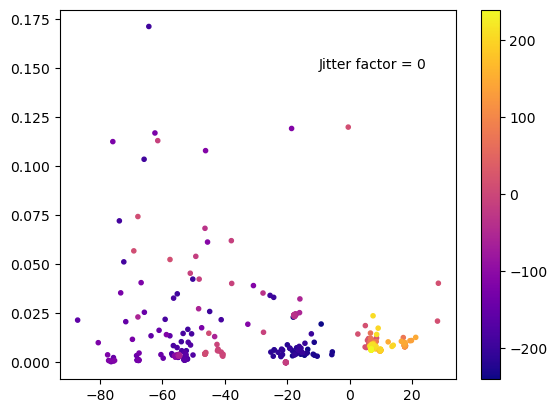

In [174]:
# %matplotlib inline # To show a static image in the notebook
%matplotlib # To show the interactive video using matplotlib backend
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import matplotlib.animation as anim
fig, ax = plt.subplots()
ax: Axes = ax
x = dat['anglez']
y = dat['enmo']
dat_len = len(dat)
mid = dat['step'].iat[int(dat_len/2)]
c = [i - mid for i in dat['step']]
coll = ax.scatter(x,y, c=c, cmap='plasma', marker='.')
plt.colorbar(coll, ax=ax)
txt = ax.text(-10,0.15,'Some Text')
x_jit = (np.random.random_sample((dat_len,))-0.5)*x.std()
y_jit = (np.random.random_sample((dat_len,))-0.5)*y.std()
jit = [0, 0.1, 0.2, 0.3]
def animate(frame):
    j = jit[frame]
    coll.set(offsets=[i for i in zip(x+x_jit*j, y+y_jit*j)])
    txt.set_text(f'Jitter factor = {j}')
    return [coll, txt]
ani = anim.FuncAnimation(func=animate, fig=fig, frames=len(jit), blit=True, interval=500)
plt.show()

In [ ]:
def init_frame(ax: Axes):
    '''
    Create an empty figure with containers for everything that will go in it.

    Returns
    -------
    A list of the containers
    ''''
    